<a href="https://colab.research.google.com/github/skyil7/SejongUniv_ML/blob/master/2.KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# K-최근접 이웃
- [블로그](https://skyil.tistory.com/107?category=425540)
- 아래는 Iris 데이터를 이용한 실습

In [1]:
import seaborn as sns
iris=sns.load_dataset('iris') # IRIS 데이터 다운
iris.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


iris flower 데이터는 3가지 종의 붓꽃들에 대한 5차원 정보를 저장하고 있다.

## seaborn.pairplot 함수
`pairplot()` 함수는 2차원 이상의 데이터에 대하여, 각각의 데이터를 축으로 하는 scatter plot을 그려준다. 같은 데이터가 만나는 대각 행렬에는 해당 데이터의 히스토그램을 그려준다.

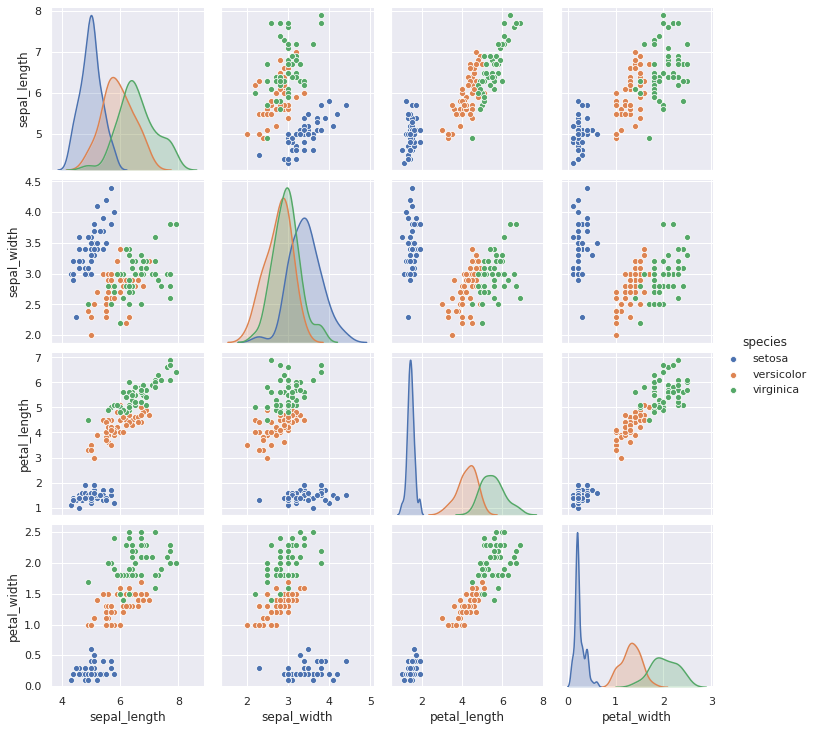

In [3]:
sns.set()
sns.pairplot(iris, hue='species', size=2.5)

In [5]:
# x,y 데이터 정의
x = iris.drop('species', axis=1)
y = iris['species']

## Y Label One-Hot Encoding

In [12]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
classle=LabelEncoder()
y=classle.fit_transform(iris['species'].values)
print('species:', np.unique(classle.inverse_transform(y)), 'labeled to', np.unique(y))

species: ['setosa' 'versicolor' 'virginica'] labeled to [0 1 2]


## Train-Test Split
train set과 test set을 나눠준다. 이때, stratify 옵션을 활용하면 각 class의 비율을 유지하며 데이터를 나눌 수 있다.

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=1, stratify=y)
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


## 데이터 표준화

In [19]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

## KNN 적용
- 사이킷런 KNN 알고리즘은 민코프스키 거리를 사용한다.
- `n_neighbors`에 `k`를 입력하고, `p`는 아래 공식의 $p$이다.
$$d(x_i, x_j) = ^P\sqrt{\Sigma^d_{k=1} \mid x_{ik}-x{jk} \mid ^P} $$

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2) # k=5, p=2 (유클라디안 거리)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 결과 확인

In [22]:
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum())

Misclassified training samples: 4
Misclassified test samples: 3


In [23]:
from sklearn.metrics import accuracy_score # 정확도 계산
print(accuracy_score(y_test,y_test_pred))

0.9333333333333333


In [24]:
from sklearn.metrics import confusion_matrix#  오분류표 작성
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.
conf                                                    # 예를들어, 두번째 행의 versicolor는 13개를 정확히 분류하고 2개를 virginica로 오분류했음

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]])